In [1]:
import psycopg2
import getpass
import pandas as pd

In [2]:
print(psycopg2.__version__)

2.9.9 (dt dec pq3 ext lo64)


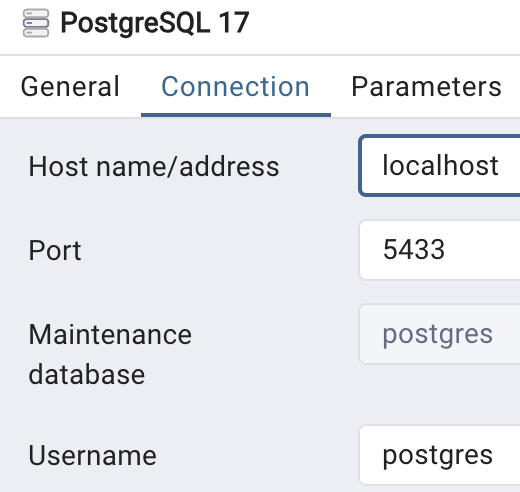

In [3]:
database_name = f'{getpass.getpass('database name: ')}'
host_name = 'localhost'
my_port = '5433'
username = 'postgres'
pass_word = f'{getpass.getpass('password: ')}'

database name: ········
password: ········


In [4]:
try:
    conn = psycopg2.connect(
        database = database_name,
        user = username,
        password = pass_word,
        host = host_name,
        port = my_port)
    print(f"Database {database_name[:3]+"***"} connected.")
except:
    print(f"Database {database_name[:3]+"***"} cannot be connected.")

Database opm*** connected.


   The `cursor` class allows python code to execute PostgreSQL command in a database session. Cursors are created by the `connection.cursor()` method: they are bound to the connection for the entire lifetime and all the commands are executed in the context of the database session wrapped by the connection.

   Reference: https://www.psycopg.org/docs/cursor.html

In [5]:
# Open a cursor to perform database operations
cur = conn.cursor()

In [6]:
cur.execute(
    "SELECT table_schema, table_name FROM information_schema.tables WHERE table_schema = 'public'")
print(cur.fetchone())

('public', 'fact')


In [7]:
cur.fetchone()

('public', 'agency')

In [8]:
cur.fetchone()

('public', 'locat')

In [9]:
query_all_tables = pd.read_sql_query("""
SELECT table_schema, 
table_name, 
table_type 
FROM information_schema.tables 
WHERE table_schema = 'public'
""",
                                    conn)

/var/folders/n9/04pbbq7530z_9231l9_lbz740000gn/T/ipykernel_84789/3204477880.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_all_tables = pd.read_sql_query("""


In [10]:
df_all_tables = pd.DataFrame(query_all_tables)
df_all_tables

,table_schema,table_name,table_type
0,public,fact,BASE TABLE
1,public,agency,BASE TABLE
2,public,locat,BASE TABLE
3,public,age,BASE TABLE
4,public,education,BASE TABLE
5,public,occupation,BASE TABLE
6,public,occucat,BASE TABLE
7,public,stem,BASE TABLE
8,public,supervisor,BASE TABLE
9,public,appointment,BASE TABLE


In [11]:
sql_cm63_hq_toa = pd.read_sql_query("""
SELECT * FROM cm63_hq_sep2024_toa
""", conn)
df_cm63_hq_toa = pd.DataFrame(sql_cm63_hq_toa)
df_cm63_hq_toa

/var/folders/n9/04pbbq7530z_9231l9_lbz740000gn/T/ipykernel_84789/3773027950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_cm63_hq_toa = pd.read_sql_query("""


,tenure-type,tenure,headcount,pct,time
0,Permanent,10-Competitive Service - Career,3668,81.86,2024-09-01
1,Permanent,15-Competitive Service - Career-Conditional,406,9.06,2024-09-01
2,Permanent,30-Excepted Service - Schedule A,200,4.46,2024-09-01
3,Permanent,35-Excepted Service - Schedule D,18,0.40,2024-09-01
4,Permanent,38-Excepted Service - Other,18,0.40,2024-09-01
5,Permanent,50-Senior Executive Service - Career,45,1.00,2024-09-01
6,Permanent,55-Senior Executive Service - Non-Career,2,0.04,2024-09-01
7,Non-permanent,20-Competitive Service,12,0.27,2024-09-01
8,Non-permanent,40-Excepted Service - Schedule A,105,2.34,2024-09-01
9,Non-permanent,45-Excepted Service - Schedule D,5,0.11,2024-09-01


In [12]:
cur.close()
conn.close()